# Time Series Analysis using scikit-learn


<a id="top"></a>
## Table of Contents

- [Load libraries](#load_libraries)
- [PART 1 Capstone Project](#part1_capstone_project)
    - [Transform json files into dataframe](#transform_json_files_to_dataframe)
    - [Transform dataframe](#transform_dataframe)
    - [Dataframe information](#dataframe_information)
    - [Dataframe visualizations](#dataframe_visualizations)
    - [Transform to time series dataframe](#transform_to_time_series_dataframe)
    - [Time Series visualizations](#time_series_visualizations)
    - [Save as csv files](#save_as_csv_files)
- [PART 2 Capstone Project](#part2_capstone_project)
    - [Train the models](#train_models)
    - [Load the models](#load_models)
    - [Make prediction](#make_prediction)
- [PART 3 Capstone Project](#part3_capstone_project)
    - [Create a flask application](#create_a_flask_application)
    - [Test the flask application](#test_the_flask_application)
    - [Create a requirements.txt file](#create_a_requirements_txt_file)
    - [Build the Docker image and run it](#build_the_docker_image_and_run_it)
    - [Test the running application](#test_the_running_application)

<a id="load_libraries"></a>
## Load libraries
[Top](#top)

In [1]:
# Importing necessary libraries
import os
import sys
import re
import jsonTool
import dataframeTool
import visualizationTool
import displayTool
import fileFolderManagementTool
import modelTool

%matplotlib inline

<a id="part1_capstone_project"></a>
## PART 1 Capstone Project
[Top](#top)

In [2]:
data_dir = os.path.join(".","cs-train")

<a id="#transform_json_files_to_dataframe"></a>
## Transform json files into dataframe
[Top](#top)

In [3]:
displayTool.printmd("**Importing and Loading the json data into one data frame:**",  color="blue")
fl = jsonTool.jsonFilesList(data_dir)   
df = jsonTool.jsonFilesToOneDf(data_dir)

<span style='color:blue'>**Importing and Loading the json data into one data frame:**</span>

invoices-2017-11.json
	Number of items in the file: 9502
invoices-2017-12.json
	Number of items in the file: 35726
invoices-2018-01.json
	Number of items in the file: 35682
invoices-2018-02.json
	Number of items in the file: 29873
invoices-2018-03.json
	Number of items in the file: 38618
invoices-2018-04.json
	Number of items in the file: 33183
invoices-2018-05.json
	Number of items in the file: 38391
invoices-2018-06.json
	Number of items in the file: 38987
invoices-2018-07.json
	Number of items in the file: 34097
invoices-2018-08.json
	Number of items in the file: 33448
invoices-2018-09.json
	Number of items in the file: 42379
invoices-2018-10.json
	Number of items in the file: 61752
invoices-2018-11.json
	Number of items in the file: 86138
invoices-2018-12.json
	Number of items in the file: 50166
invoices-2019-01.json
	Number of items in the file: 39121
invoices-2019-02.json
	Number of items in the file: 27418
invoices-2019-03.json
	Number of items in the file: 35055
invoices-2019-0

<a id="#transform_dataframe"></a>
## Transform dataframe
[Top](#top)

In [4]:
df = dataframeTool.transform(df)

	Duration for the dataframe transformation: 3.9262599


<a id="#dataframe_transformation"></a>
## Dataframe information
[Top](#top)

In [5]:
dataframeTool.display_df_info(df)

<span style='color:blue'>**df.info:**</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815011 entries, 0 to 815010
Data columns (total 10 columns):
country         815011 non-null object
customer_id     625249 non-null float64
day             815011 non-null int64
invoice         815011 non-null object
month           815011 non-null int64
price           815011 non-null float64
stream_id       815011 non-null object
times_viewed    815011 non-null int64
year            815011 non-null int64
invoice_date    815011 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 62.2+ MB
None

	df: 815011 x 10




<span style='color:blue'>**Missing values:**</span>

	Missing Value Summary
-----------------------------------
country              0
customer_id     189762
day                  0
invoice              0
month                0
price                0
stream_id            0
times_viewed         0
year                 0
invoice_date         0
dtype: int64




<span style='color:blue'>**df.describe:**</span>

         customer_id            day          month          price  \
count  625249.000000  815011.000000  815011.000000  815011.000000   
mean    15333.415068      15.064819       6.592718       4.802631   
std      1698.360788       8.788845       3.598781     135.058707   
min     12346.000000       1.000000       1.000000  -53594.360000   
25%     13956.000000       7.000000       3.000000       1.250000   
50%     15279.000000      15.000000       6.000000       2.100000   
75%     16813.000000      23.000000      10.000000       4.210000   
max     18287.000000      31.000000      12.000000   38970.000000   

        times_viewed           year  
count  815011.000000  815011.000000  
mean        5.231106    2018.247654  
std         5.109982       0.545261  
min         0.000000    2017.000000  
25%         1.000000    2018.000000  
50%         3.000000    2018.000000  
75%         8.000000    2019.000000  
max        24.000000    2019.000000  




<span style='color:blue'>**df.head:**</span>

          country  customer_id  day invoice  month  price stream_id  \
0  United Kingdom      13085.0   28  489434     11   6.95     85048   
1  United Kingdom      13085.0   28  489434     11   6.75    79323W   
2  United Kingdom      13085.0   28  489434     11   2.10     22041   
3  United Kingdom      13085.0   28  489434     11   1.25     21232   
4  United Kingdom      13085.0   28  489434     11   1.65     22064   

   times_viewed  year invoice_date  
0            12  2017   2017-11-28  
1            12  2017   2017-11-28  
2            21  2017   2017-11-28  
3             5  2017   2017-11-28  
4            17  2017   2017-11-28  


<span style='color:blue'>**Countries Info:**</span>

Australia Austria Bahrain Belgium Bermuda Brazil Canada Channel Islands Cyprus Czech Republic Denmark EIRE European Community Finland France Germany Greece Hong Kong Iceland Israel Italy Japan Korea Lebanon Lithuania Malta Netherlands Nigeria Norway Poland Portugal RSA Saudi Arabia Singapore Spain Sweden Switzerland Thailand USA United Arab Emirates United Kingdom Unspecified West Indies 
Number of different countries: 43


<span style='color:blue'>**Top Ten countries in term of revenue:**</span>

['United Kingdom' 'EIRE' 'Germany' 'France' 'Norway' 'Spain' 'Hong Kong'
 'Portugal' 'Singapore' 'Netherlands']


<span style='color:blue'>**Streams Info:**</span>


Number of different streams: 5007


<span style='color:blue'>**Years Info:**</span>

2017 2018 2019 
Number of different years: 3


<span style='color:blue'>**df year value counts:**</span>

2018    522714
2019    247069
2017     45228
Name: year, dtype: int64


<span style='color:blue'>**df year month price sum:**</span>

year  month
2017  11        41152.750
      12       157155.010
2018  1        183680.394
      2        116345.374
      3        257428.441
      4        116642.342
      5        155748.790
      6        229099.440
      7        108378.730
      8        156605.000
      9        222500.981
      10       279360.780
      11       335170.912
      12       365051.560
2019  1        188110.660
      2        128476.940
      3        161572.990
      4        152566.451
      5        176966.130
      6        189927.250
      7        192256.441
Name: price, dtype: float64


<span style='color:blue'>**df year month price max:**</span>

               price
year month          
2017 11      1998.49
     12      1213.02
2018 1       8985.60
     2       1508.65
     3      10953.50
     4       5876.34
     5       2396.61
     6      25111.09
     7       3610.50
     8      18910.69
     9      10468.80
     10     10468.80
     11      6706.71
     12     13541.33
2019 1      16888.02
     2       5575.28
     3       5693.05
     4       8142.75
     5       7006.83
     6      38970.00
     7       6721.37


<span style='color:blue'>**How many days did the entire range of dates span?**</span>

495


<span style='color:blue'>**How many different countries?**</span>

43


<span style='color:blue'>**How many invoices per country?**</span>

United Kingdom          751228
EIRE                     13577
Germany                  13336
France                    9899
Netherlands               4024
Spain                     2606
Switzerland               2326
Belgium                   2166
Portugal                  1815
Australia                 1543
Channel Islands           1287
Sweden                    1156
Italy                     1049
Cyprus                     907
Norway                     796
Finland                    749
Austria                    719
Denmark                    629
Greece                     627
Unspecified                614
Japan                      514
United Arab Emirates       462
Poland                     429
Singapore                  310
Hong Kong                  276
USA                        266
Canada                     223
Malta                      219
Iceland                    195
Lithuania                  189
Israel                     139
Bahrain                    126
RSA     

In [6]:
displayTool.printmd("**Display Pivot Tables:**",  color="blue")
dataframeTool.displayPivotTables(df)

<span style='color:blue'>**Display Pivot Tables:**</span>

<span style='color:blue'>**Pivot Table Index(country), Values(price)**</span>

                             price
country                           
Australia             6.872630e+03
Austria               3.390890e+03
Bahrain               4.394900e+02
Belgium               1.119061e+04
Bermuda               8.470000e+01
Brazil                2.563100e+02
Canada                1.053100e+03
Channel Islands       7.610120e+03
Cyprus                4.976300e+03
Czech Republic        3.183000e+01
Denmark               1.818510e+03
EIRE                  1.070692e+05
European Community    2.940500e+02
Finland               3.364650e+03
France                4.056514e+04
Germany               4.927182e+04
Greece                2.437370e+03
Hong Kong             1.445257e+04
Iceland               5.098600e+02
Israel                4.575900e+02
Italy                 5.910190e+03
Japan                 1.083120e+03
Korea                 1.502400e+02
Lebanon               3.586100e+02
Lithuania             4.944100e+02
Malta                 6.085340e+03
Netherlands         

<span style='color:blue'>**Pivot Table Index(country), Values(price), Columns(year)**</span>

                          price                            
year                       2017          2018          2019
country                                                    
Australia                 59.65  4.140330e+03  2.672650e+03
Austria                  191.40  2.356520e+03  8.429700e+02
Bahrain                    0.00  3.567300e+02  8.276000e+01
Belgium                  209.10  7.291000e+03  3.690510e+03
Bermuda                    0.00  8.470000e+01  0.000000e+00
Brazil                     0.00  1.137100e+02  1.426000e+02
Canada                     0.00  1.475100e+02  9.055900e+02
Channel Islands          171.93  5.306960e+03  2.131230e+03
Cyprus                   893.47  1.719090e+03  2.363740e+03
Czech Republic             0.00  0.000000e+00  3.183000e+01
Denmark                   69.68  1.154230e+03  5.946000e+02
EIRE                    4433.09  7.439830e+04  2.823782e+04
European Community         0.00  0.000000e+00  2.940500e+02
Finland                   50.89  1.44647

<span style='color:blue'>**Pivot Table Index(country, year), Values(price, times_viewed)**</span>

                                  price  times_viewed
country              year                            
Australia            2017  5.965000e+01           146
                     2018  4.140330e+03          6023
                     2019  2.672650e+03          7605
Austria              2017  1.914000e+02           284
                     2018  2.356520e+03          4434
                     2019  8.429700e+02          1539
Bahrain              2018  3.567300e+02           846
                     2019  8.276000e+01           123
Belgium              2017  2.091000e+02           134
                     2018  7.291000e+03          9487
                     2019  3.690510e+03          8112
Bermuda              2018  8.470000e+01           361
Brazil               2018  1.137100e+02           175
                     2019  1.426000e+02           258
Canada               2018  1.475100e+02           770
                     2019  9.055900e+02          1352
Channel Islands      2017  1

<span style='color:blue'>**Pivot Table Index(country, year), Values(price), Columns(stream_id)**</span>

                              sum                                         \
                            price                                          
stream_id                   10002 10002R 10080 10109 10120 10123C 10123G   
country              year                                                  
Australia            2017    0.00   0.00  0.00  0.00  0.00   0.00   0.00   
                     2018    1.70   0.00  0.00  0.00  0.00   0.00   0.00   
                     2019    0.00   0.00  0.00  0.00  0.00   0.00   0.00   
Austria              2017    0.00   0.00  0.00  0.00  0.00   0.00   0.00   
                     2018    0.00   0.00  0.00  0.00  0.00   0.65   0.00   
                     2019    0.00   0.00  0.00  0.00  0.00   0.00   0.00   
Bahrain              2018    0.00   0.00  0.00  0.00  0.00   0.00   0.00   
                     2019    0.00   0.00  0.00  0.00  0.00   0.00   0.00   
Belgium              2017    0.00   0.00  0.00  0.00  0.00   0.00   0.00   
            

<span style='color:blue'>**Pivot Table Index(country, year, stream_id), Values(price, times_viewed)**</span>

                            price  times_viewed
country     year stream_id                     
Australia   2017 20717       1.25            10
                 20727       1.65            10
                 20728       1.65            10
                 20730       1.25            10
                 21125       1.25             1
...                           ...           ...
West Indies 2018 84508A      2.55             2
                 84795B      7.95             1
                 84827       0.65             9
                 84944       4.25             4
                 85040B      1.65            12

[36366 rows x 2 columns]


<span style='color:blue'>**Pivot Table Index(country, year, stream_id), Values(price, times_viewed)**</span>

                                    sum                   mean             
                                  price times_viewed     price times_viewed
country     year stream_id                                                 
Australia   2017 20717            1.250           10  1.250000    10.000000
                 20727            1.650           10  1.650000    10.000000
                 20728            1.650           10  1.650000    10.000000
                 20730            1.250           10  1.250000    10.000000
                 21125            1.250            1  1.250000     1.000000
...                                 ...          ...       ...          ...
West Indies 2018 84795B           7.950            1  7.950000     1.000000
                 84827            0.650            9  0.650000     9.000000
                 84944            4.250            4  4.250000     4.000000
                 85040B           1.650           12  1.650000    12.000000
All         

<a id="#dataframe_visualizations"></a>
## Dataframe visualizations
[Top](#top)

<span style='color:blue'>** Number of Invoices per day of Week**</span>

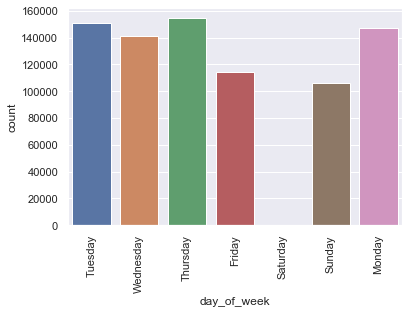

<span style='color:blue'>** Number of Invoices per Month over the years**</span>

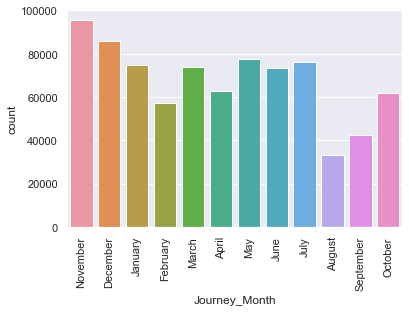

In [7]:
visualizationTool.plot_graphs_df(df)

<span style='color:blue'>**Plot correlation:**</span>

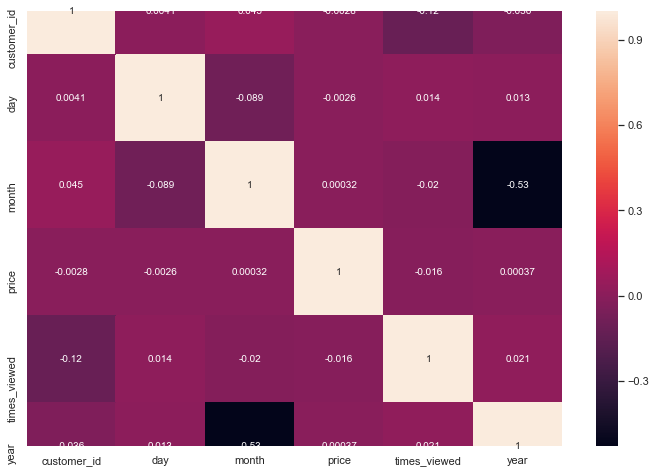

In [8]:
displayTool.printmd("**Plot correlation:**",  color="blue")
visualizationTool.plot_corr(df)

<span style='color:blue'>**Plot Countries:**</span>

<span style='color:blue'>**10 Top Countries / Years**</span>

Country: United Kingdom


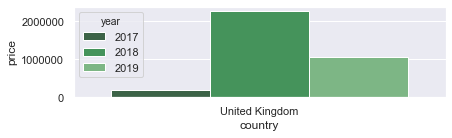

Country: EIRE
Country: Germany
Country: France
Country: Norway
Country: Spain
Country: Hong Kong
Country: Portugal
Country: Singapore
Country: Netherlands


<span style='color:blue'>**10 Top Countries / Months**</span>

Country: United Kingdom


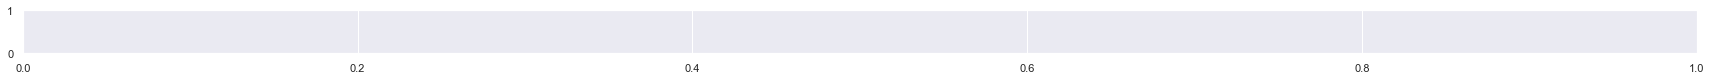

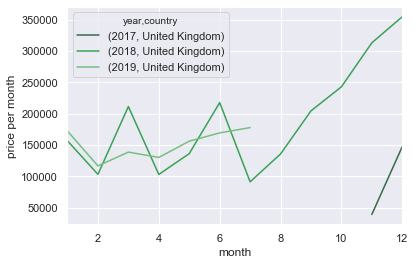

Country: EIRE


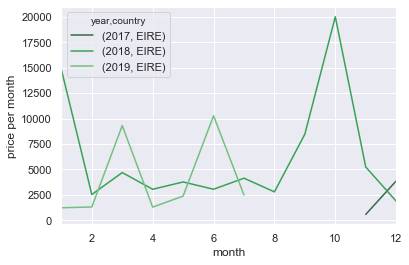

Country: Germany


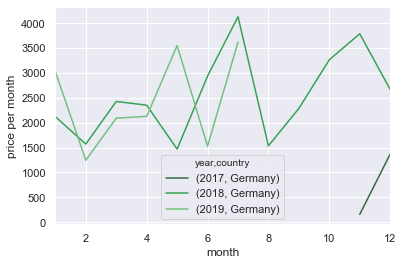

Country: France


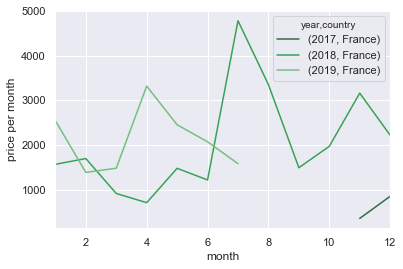

Country: Norway


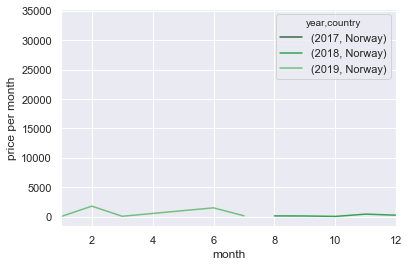

Country: Spain


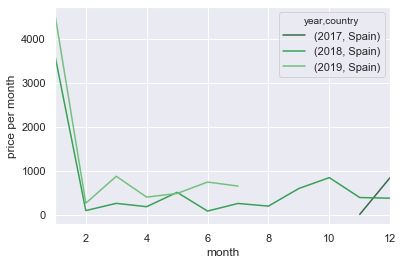

Country: Hong Kong


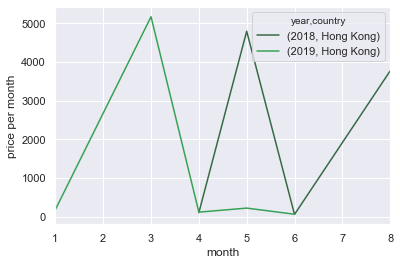

Country: Portugal


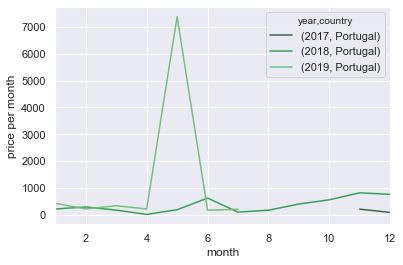

Country: Singapore


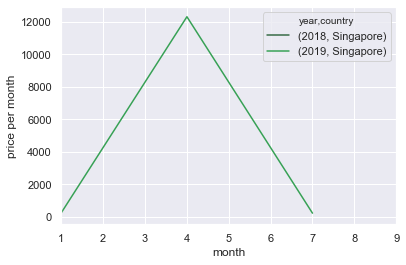

Country: Netherlands


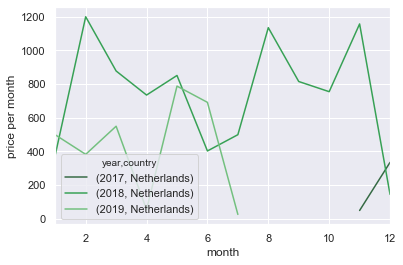

<span style='color:blue'>**All Countries / Years / Months**</span>

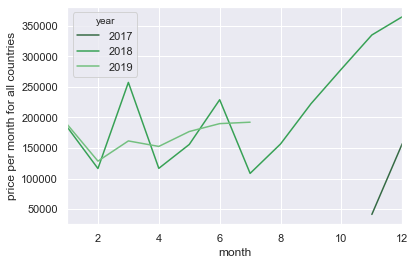

<span style='color:blue'>**All Countries / Days of Week**</span>

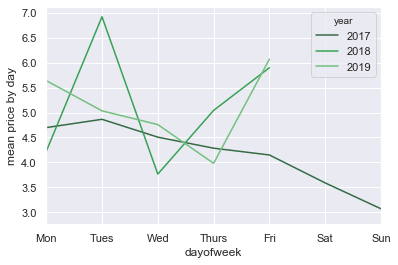

In [9]:
displayTool.printmd("**Plot Countries:**",  color="blue")
visualizationTool.top_10_countries_years(df)
visualizationTool.top_10_countries_months(df)
visualizationTool.all_countries_year_months(df)
visualizationTool.all_countries_days_of_week(df)   

<a id="#transform_to_time_series_dataframe"></a>
## Transform to time series dataframe
[Top](#top)

In [10]:
df1 = dataframeTool.convert_to_ts(df)
dataframeTool.display_ts_df_info(df1)

	Duration for the transformation to an indexed Dataframe: 6.260653300000001


<span style='color:blue'>**ts df.head:**</span>

        date  purchases  unique_invoices  unique_streams  total_views  \
0 2017-11-01          0                0               0            0   
1 2017-11-02          0                0               0            0   
2 2017-11-03          0                0               0            0   
3 2017-11-04          0                0               0            0   
4 2017-11-05          0                0               0            0   

  year_month  revenue  
0    2017-11      0.0  
1    2017-11      0.0  
2    2017-11      0.0  
3    2017-11      0.0  
4    2017-11      0.0  


<span style='color:blue'>**ts df.info:**</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 7 columns):
date               607 non-null datetime64[ns]
purchases          607 non-null int32
unique_invoices    607 non-null int64
unique_streams     607 non-null int64
total_views        607 non-null int64
year_month         607 non-null object
revenue            607 non-null float64
dtypes: datetime64[ns](1), float64(1), int32(1), int64(3), object(1)
memory usage: 30.9+ KB
None


<span style='color:blue'>**ts df.count:**</span>

date               607
purchases          607
unique_invoices    607
unique_streams     607
total_views        607
year_month         607
revenue            607
dtype: int64


<span style='color:blue'>**ts df.count where pourchases = 0 :**</span>

139


<a id="#time_series_visualizations"></a>
## Time Series visualizations
[Top](#top)

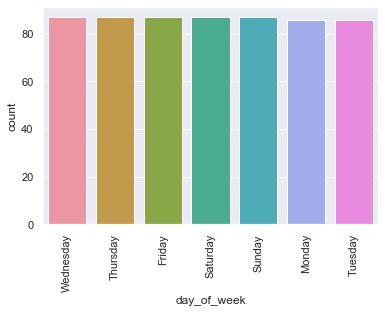

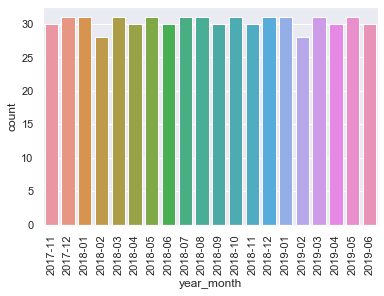

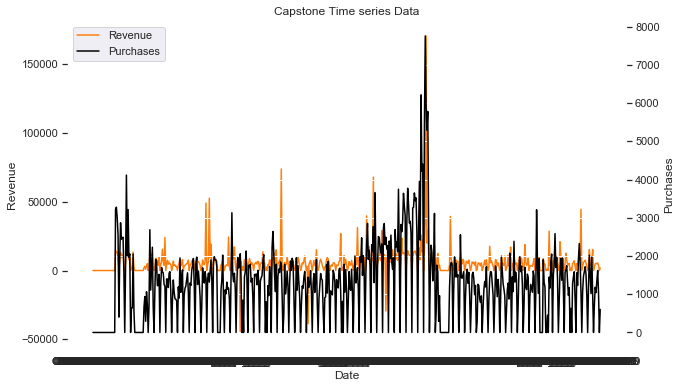

In [11]:
visualizationTool.plot_ts_df(df1)
visualizationTool.plot_ts_df_3(df1)

<a id="#save_as_csv_files"></a>
## Save as csv files
[Top](#top)

In [12]:
displayTool.printmd("**Clean ts_data folder:**",  color="blue")
fileFolderManagementTool.clean_ts_data_dir(clean=True)
displayTool.printmd("**Generate csv files:**",  color="blue")
dfs=dataframeTool.fetch_ts(df,df1)

<span style='color:blue'>**Clean ts_data folder:**</span>

cleaning ts_data folder...


<span style='color:blue'>**Generate csv files:**</span>

	Duration for the transformation to an indexed Dataframe: 7.848515599999999
	Duration for the transformation to an indexed Dataframe: 2.9063844000000074
	Duration for the transformation to an indexed Dataframe: 2.908518000000001
	Duration for the transformation to an indexed Dataframe: 2.8469944
	Duration for the transformation to an indexed Dataframe: 2.8245620000000002
	Duration for the transformation to an indexed Dataframe: 2.959276200000005
	Duration for the transformation to an indexed Dataframe: 2.3494948999999963
	Duration for the transformation to an indexed Dataframe: 2.8254048999999952
	Duration for the transformation to an indexed Dataframe: 2.4283085
	Duration for the transformation to an indexed Dataframe: 2.762646799999999


<a id="part2_capstone_project"></a>
## PART 2 Capstone Project
[Top](#top)

<a id="#train_models"></a>
## Train the models
[Top](#top)

In [ ]:
fileFolderManagementTool.clean_ts_data_dir(clean=True)   
modelTool.model_train(df, df1,test=False)
modelTool.model_train(df, df1,test=True)

cleaning ts_data folder...
	Duration for the transformation to an indexed Dataframe: 7.585725400000001
	Duration for the transformation to an indexed Dataframe: 2.871629299999995
	Duration for the transformation to an indexed Dataframe: 3.485380399999997
	Duration for the transformation to an indexed Dataframe: 2.8885609000000017
	Duration for the transformation to an indexed Dataframe: 2.7857019000000065
	Duration for the transformation to an indexed Dataframe: 2.8223180999999897
	Duration for the transformation to an indexed Dataframe: 2.4455798000000186
	Duration for the transformation to an indexed Dataframe: 2.704837800000007
	Duration for the transformation to an indexed Dataframe: 2.48836129999998
	Duration for the transformation to an indexed Dataframe: 2.813231099999996
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from

... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... load

... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... load

... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... load

... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... load

... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... load

... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... load

... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... load

... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... load

... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... load

... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... loading ts data from files
... load

<a id="#load_models"></a>
## Load the models
[Top](#top)   

In [ ]:
all_data, all_models = modelTool.model_load()
displayTool.printmd("**Model Loaded:**",  color="blue")
print(all_models.keys())

<a id="#make_prediction"></a>
## Make prediction
[Top](#top)   

In [ ]:
country='all'
year='2018'
month='01'
day='05'
result = modelTool.model_predict(country,year,month,day)
displayTool.printmd("**Prediction result:**",  color="blue")
print(result)

<a id="part3_capstone_project"></a>
## PART 3 Capstone Project
[Top](#top)

<a id="#create_a_flask_application"></a>
## Create a flask application
[Top](#top)   

In [4]:
%%writefile app.py

from flask import Flask, jsonify, request, render_template, make_response
import joblib
import socket
import json
import pandas as pd
import os
import modelTool

MODEL_DIR = "models"
DATA_DIR = "data"

app = Flask(__name__)

@app.route("/")
def hello():
    html = "<h3>Hello {name}!</h3>" \
           "<b>Hostname:</b> {hostname}<br/>"
    return html.format(name=os.getenv("NAME", "world"), hostname=socket.gethostname())

def page_not_found(e):
    return "<h1>404</h1><p>The resource could not be found.</p>", 404

@app.route('/predict', methods=['GET', 'POST'])

def main():
    if request.method == 'GET':
        return(render_template('main.html'))
    if request.method == 'POST':
        country = request.form['country']
        year = request.form['year']
        month = request.form['month']
        day = request.form['day']   
        prediction = modelTool.model_predict(country,year,month,day) 
        return render_template('main.html',
                                     original_input={'Country':country,
                                                     'Year':year,
                                                     'Month':month,
                                                     'Day':day,
                                                     },
                                     result=prediction,
                                     )
 
if __name__ == '__main__':
    # host 127.0.0.1 if i run locally on windows without docker
    #app.run(host='127.0.0.1', port=7000,debug=True)
    # host 0.0.0.0 if i run in a docker container
    app.run(host='0.0.0.0', port=7000,debug=True)

Overwriting app.py


<a id="#test_the_flask_application"></a>
## Test the flask application
[Top](#top) 

```bash
$ python app.py
```

Then go to [http://0.0.0.0:8080/](http://0.0.0.0:8080/)

Stop the server.

 <a id="#create_a_requirements_txt_file"></a>
## Create a requirements.txt file
[Top](#top) 

```bash
$ pip freeze > requirements.txt
```

In [7]:
%%writefile Dockerfile

# Use an official Python runtime as a parent image
FROM python:3.8.2

RUN apt-get update && apt-get install -y \
python3-dev \
build-essential    
  
# Set the working directory to /app-docker
WORKDIR /app-docker
  
# Copy the current directory contents into the container at /app-docker
COPY . /app-docker

# Install any needed packages specified in requirements.txt
RUN pip install --upgrade pip
RUN pip install --no-cache-dir -r requirements.txt

EXPOSE 7000

# Run app.py when the container launches
CMD ["python", "app.py"]

Overwriting Dockerfile


<a id="#build_the_docker_image_and_run_it"></a>
## Build the Docker image and run it
[Top](#top) 

Step one: build the image (from the directory that was created with this notebook)

    ~$ docker build -t myapp .

Run the container

    ~$ docker run -p 7000:7000 myapp

<a id="#test_the_running_application"></a>
## Test the running application
[Top](#top) 

First go to http://0.0.0.0:7000/predict to ensure the app is running and accessible.

Enter the following values for the different parameters:

- Country: all
- Year: 2018
- Month: 05
- Day: 01

Then click on submit

The result displays on the screen:

![Kiku](images/pred-result-in-flask-app.png) 